# EX-1: Practice logistic regression with synthetic data

Use Scikit's make_blobs or make_classification to generate some sample data.

In [16]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)
print(X.shape)

(10, 2)


In [17]:
y

array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])

# Do Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X,y)


LogisticRegression()

In [20]:
print ("coefficients :", lr.coef_)
print ('intercept: ', lr.intercept_)

coefficients : [[ 0.17530638  0.95157199]
 [ 0.67747295 -0.63060308]
 [-0.85277934 -0.3209689 ]]
intercept:  [-2.46906383  0.4252824   2.04378143]


# Predictions

In [21]:
predictions = lr.predict(X)
print ('predictions : ', predictions[:10])

predictions :  [0 0 1 0 2 2 2 1 1 0]


# Calculate the errors

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predictions)

print ('MSE :', mse)
print ('RMSE :', rmse)
print ('MAE :', mae)

MSE : 0.0
RMSE : 0.0
MAE : 0.0


# EX-2: College Admission Data

1. college admission data

In [25]:
admin = pd.read_csv("admission-data.csv")
admin

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,0,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
95,0,660,3.33,2
96,0,640,3.52,4
97,0,480,3.57,2
98,0,700,2.88,2


2. Use input features: gre, gpa, rank, and predict output: admit

In [31]:
Y = np.asarray(admin['admit'])
print(y)

[0 0 1 0 2 2 2 1 1 0]


In [32]:
X = np.asarray(admin[['gre', 'gpa', 'rank']])
print(X)

[[380.     3.61   3.  ]
 [660.     3.67   3.  ]
 [800.     4.     1.  ]
 [640.     3.19   4.  ]
 [520.     2.93   4.  ]
 [760.     3.     2.  ]
 [560.     2.98   1.  ]
 [400.     3.08   2.  ]
 [540.     3.39   3.  ]
 [700.     3.92   2.  ]
 [800.     4.     4.  ]
 [440.     3.22   1.  ]
 [760.     4.     1.  ]
 [700.     3.08   2.  ]
 [700.     4.     1.  ]
 [480.     3.44   3.  ]
 [780.     3.87   4.  ]
 [360.     2.56   3.  ]
 [800.     3.75   2.  ]
 [540.     3.81   1.  ]
 [500.     3.17   3.  ]
 [660.     3.63   2.  ]
 [600.     2.82   4.  ]
 [680.     3.19   4.  ]
 [760.     3.35   2.  ]
 [800.     3.66   1.  ]
 [620.     3.61   1.  ]
 [520.     3.74   4.  ]
 [780.     3.22   2.  ]
 [520.     3.29   1.  ]
 [540.     3.78   4.  ]
 [760.     3.35   3.  ]
 [600.     3.4    3.  ]
 [800.     4.     3.  ]
 [360.     3.14   1.  ]
 [400.     3.05   2.  ]
 [580.     3.25   1.  ]
 [520.     2.9    3.  ]
 [500.     3.13   2.  ]
 [520.     2.68   3.  ]
 [560.     2.42   2.  ]
 [580.     3.32 

3. Use Logistic Regression to predict.

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(admin[['gre', 'gpa', 'rank']])
Y = np.asarray(admin['admit'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

Score:  0.696969696969697
Weights:  [[ 0.01318323  1.69831743 -0.36462922]]


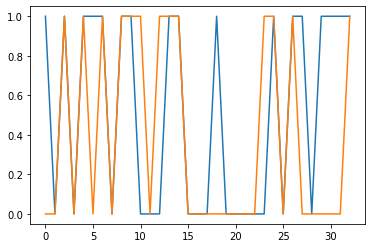

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)
print('Score: ', logReg.score(X_test, y_test))
print('Weights: ', logReg.coef_)

plt.plot(logReg.predict(X_test))
plt.plot(y_test)
plt.show()

In [40]:
y_pred=logReg.predict(X_test)

In [41]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

4. Create a confusion matrix

In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  7],
       [ 3, 10]], dtype=int64)

5. What is the accuracy of the model

In [43]:
print('Score: ', logReg.score(X_test, y_test)) # The accuracy of the model is 0.7 (70%)

Score:  0.696969696969697


# EX-3 - BONUS Lab

# US Census Income data

1. Running Python Library that requires for this lab

In [148]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import os
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
%matplotlib inline

2. Loading the dataset

In [149]:
adult = pd.read_csv("adult.csv")
adult

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [150]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [151]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [152]:
#replacing some special character columns names with proper names 
adult.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

3. Data Cleaning

In [153]:
#Finding the special characters in the data frame 
adult.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [154]:
# code will replace the special character to nan and then drop the columns 
adult['country'] = adult['country'].replace('?',np.nan)
adult['workclass'] = adult['workclass'].replace('?',np.nan)
adult['occupation'] = adult['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
adult.dropna(how='any',inplace=True)

In [155]:
#running a loop of value_counts of each column to find out unique values. 
for c in adult.columns:
    print ("---- %s ---" % c)
    print (adult[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
88440      1
176517     1
194956     1
201105     1
208174     1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [156]:
#dropping based on uniquness of data from the dataset 
adult.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [157]:
#mapping the data into numerical data using map function
adult['income'] = adult['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [158]:
#gender
adult['gender'] = adult['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [159]:
#race
adult['race'] = adult['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [160]:
#marital
adult['marital'] = adult['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [161]:
#workclass
adult['workclass'] = adult['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)


In [162]:
#education
adult['education'] = adult['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [163]:
#occupation
adult['occupation'] = adult['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)


In [164]:
#relationship
adult['relationship'] = adult['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

4. Data Visualization

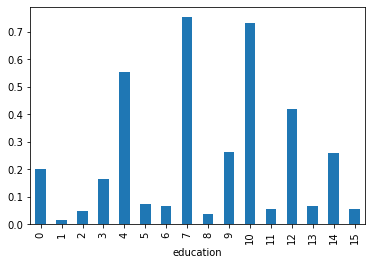

In [167]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
adult.groupby('education').income.mean().plot(kind='bar')

In [174]:
#Transform the data set into a data frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
adult_x = pd.DataFrame(np.c_[adult['relationship'], adult['education'], adult['race'],adult['occupation'],adult['gender'],adult['marital'],adult['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
adult_y = pd.DataFrame(adult.income)

5. Running Logistic Regression

In [175]:
#Initialize the linear regression model
reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(adult_x, adult_y, test_size=0.33, random_state=42)

In [176]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

C:\Users\jerry\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [177]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

array([1])

6. Accuracy Score

In [178]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603189493433395
